# Inaugural Project 2021: Housing Demand and Taxation

**Group:** SSTL

**Members:** Louise Otte Arildsen (srb330), Signe Kolind (hmk792), Stine Fürst (qvj635) & Thomas Nielsen (qzw392)

**Imports and set magics:**

In [6]:
import numpy as np
from scipy import optimize

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Question 1

**We consider a model for a household looking to buy a home. The following applies for the household:**
* The household is endowed with an amount of cash, $m$, which can be spend on housing or consumption. 
* The household derives utility based on the quality, $h$, of the house, which price is determined by $p_{h}$. 
* The house is subject to progressive taxation and mortgage costs summarized by $\tau(\cdot)$.
* The objective of the household is to find the optimal division of money spend on housing and consumption in order to maximize utility. 

**Model equations:**
$$
\begin{align}
c^{\star}, h^{\star} &=\arg \max _{c, h} c^{1-\phi} h^{\phi} \\
& \text { s.t. } \\
\widetilde{p}_{h} &=p_{h} \varepsilon \\
m &=\tau\left(p_{h}, \widetilde{p}_{h}\right)+c \\
\tau\left(p_{h}, \widetilde{p}_{h}\right) &=r p_{h}+\tau^{g} \widetilde{p}_{h}+\tau^{p} \max \left\{\widetilde{p}_{h}-\bar{p}, 0\right\}
\end{align}
$$

**Explanation:** The maximization problem of the household is to find the optimal allocation of money spend on consumption, $c$, and housing, given that the price of a house is equal to the house quality, $h$. 
Houses are taxed based on a public assesment, $\tilde{p}_{h}$, which depends on the market value of the house $p_{h}$ and a factor $\varepsilon$, which is politically set below 1. 
The household's cash endowment, $m$, is either spend on housing expenditures, $\tau\left(p_{h}, \widetilde{p}_{h}\right)$, or consumption, $c$. The housing expenditures are determined by a interest-only mortgage with interest rate, $r$, a base housing tax, $\tau^{g}$, and a progressive housing tax, $\tau^{p}$, levied on houses with a market value above the cutoff, $p$. 

By combining equation (2)-(4) and applying that $p_{h}=h$, we are able to write $c$ as a function of $h$ and thus contruct a univariate mazimization problem for the household:


$ c=m-rh-\tau^gh\varepsilon-\tau^pmax\left\{ h\varepsilon-\bar{p},0\right\} $

$c^{\star}, h^{\star} =\arg \max _{h} (m-rh-\tau^gh\varepsilon-\tau^pmax\left\{ h\varepsilon-\bar{p},0\right\})^{1-\phi} h^{\phi} $

The optimizing function used to solve the maximization problem are defined in the following code.

In [8]:
#a. setting parameter values:
m=0.5
phi=0.3
epsilon=0.5
r=0.03
tau_g=0.012
tau_p=0.004
p_bar=3

# utility function
def u_func(h, m, phi, epsilon, r, tau_g, tau_p, p_bar):
    
    """
    Utility function for a household making a housing and consumption decision subject to several          constraints. 
    The optimisation problem only considers the variable housing as consumption can bew written as an      implicit function hereof. 
    
    Input:
    h: money spent on housing 
    m: cash-on-hand for the household
    phi: elasticity
    epsilon: public assessment factor, politically determined 
    r: mortgage interest rate
    tau_g: base tax rate
    tau_p: progressive tax rate
    p_bar: cutoff value for homes regarding the progressive tax rate
    
    Output: Utility given housing choice. 
    """  
    
    c=m-r*h - tau_g*h*epsilon - tau_p*max((h*epsilon-p_bar),0)
    u = (c**(1-phi))*(h**phi)
    return u


# scalar optimiser function
def u_optimiser(m, phi, epsilon, r, tau_g, tau_p, p_bar):

    def objective(h, m, phi, epsilon, r, tau_g, tau_p, p_bar):
        return -u_func(h=h[0], m=m, phi=phi, epsilon=epsilon, r=r, tau_g=tau_g, tau_p=tau_p, p_bar=p_bar)
    
    guess = [0.5]
    Bc = lambda h: m - r*h[0] - tau_g*h[0]*epsilon - tau_p*max((h[0]*epsilon-p_bar),0)
    sol = optimize.minimize(objective,guess,bounds=[(0,np.inf)],args=(m, phi, epsilon, r, tau_g, tau_p, p_bar),constraints={'type':'ineq','fun':Bc})
        

    h_star = sol.x[0]
    c_star = m-r*h_star - tau_g*h_star*epsilon - tau_p*max(h_star*epsilon-p_bar,0)
    u_star = u_func(h=h_star,m=m, phi=phi, epsilon=epsilon, r=r, tau_g=tau_g, tau_p=tau_p, p_bar=p_bar)
    return h_star, c_star, u_star

#b. solve maximization problem 
h_star, c_star, u_star = u_optimiser(m, phi, epsilon, r, tau_g, tau_p, p_bar)

# c. print solution for optimal choice of money spend on housing and consumption
print(f'The household will choose optimal housing = {h_star:.2f}, which implies optimal consumption = {c_star:.2f} and utility = {u_star:.2f}')

The household will choose optimal housing = 4.16, which implies optimal consumption = 0.35 and utility = 0.74


# Question 2

We want to plot $c^{\star}$ and $h^{\star}$ as functions of $m$ in the range 0.4 to 1.5.

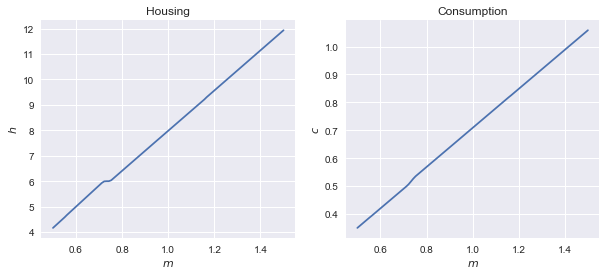

In [18]:
# a. create array of m and container for values of h and c
N=100
m = np.linspace(0.5,1.5,num=N)
h_vals = np.empty(N)
c_vals = np.empty(N)

# b. loop the optimiser over the m array
for i,mi in enumerate(m): 
    """
    Looping m[i] indexes, over optimizer in order to find optimal h and c values.
    """
    hc = u_optimiser(mi, phi, epsilon, r, tau_g, tau_p, p_bar)
    
    h_vals[i] = hc[0]
    c_vals[i] = hc[1] 

def two_figures(x_left, y_left, title_left, xlabel_left, ylabel_left, x_right, y_right, title_right, xlabel_right, ylabel_right):
    """ 
    Plots two aligned figures. 
    
    Inputs: axises, labels, titles of left/right figure. 
    Output: Two figures in 2D
    """
    # a. initialise figure
    fig = plt.figure(figsize=(10,4))# figsize is in inches...

    # b. left plot
    ax_left = fig.add_subplot(1,2,1)
    ax_left.plot(x_left,y_left)

    ax_left.set_title(title_left)
    ax_left.set_xlabel(xlabel_left)
    ax_left.set_ylabel(ylabel_left)

    # c. right plot
    ax_right = fig.add_subplot(1,2,2)

    ax_right.plot(x_right, y_right)

    ax_right.set_title(title_right)
    ax_right.set_xlabel(xlabel_right)
    ax_right.set_ylabel(ylabel_right)
    
# c. plot the figure    
two_figures(m, h_vals, "Housing", "$m$", "$h$", m, c_vals, "Consumption", "$m$", "$c$")

We see from the two graphs the optimal amount of consumption and housing for all values of cash in hand variable m between the interval of 0.5 to 1.4. The graphs is mostly linear except the interval 0.71 to 0.75, where housing costs doesn't change and consumption moves differently. 

# Question 3

We now consider $N=10000$ household looking to buy houses, but each household differ wrt. their cash endowment. The distribution of cash-on-hand is given by 

$$
m_{i} \sim \operatorname{Lognormal}(-0.4,0.35)
$$

We let the public assessment associated with the optimal housing choice of household $i$, $h_{i}^{\star}$
,be denoted $
\widetilde{p}_{h, i}^{\star}
$

$T=\sum_{i=1}^{N} \tau^{g} \widetilde{p}_{h, i}^{\star}+\tau^{p} \max \left\{\widetilde{p}_{h, i}^{\star}-\bar{p}, 0\right\}$

In the following module we calculate the average tax burden per household.

In [18]:
#a. setting parameters
size=10000
seed=1
mu=-0.4
sigma=0.35

#b. 
def tax_revenue(seed,size,mu,sigma,tau_g=0.012,epsilon=0.5,tau_p=0.004,p_bar=3):
    """
    Calculates the total tax revenue of N size agents, with utility u_func
    and log-normally distributed cash-on-hand mi.
    
    Inputs: 
    seed: seed number
    size: random values of cash-on-hand mi (i.e. number of agents) to draw from distribution         
    mu: distribution mean 
    sigma: standard deviation
    tau_g: base tax rate
    epsilon: public assessment factor, politically determined 
    tau_p: progressive tax rate
    p_bar: cutoff value for homes regarding the progressive tax rate
    
    Output: Total tax revenue from N size agents, derived from utility of housing choice 
    depending on log-normally distributed values of cash-on-hand. 
    """
    # a. set seed, draw random numbers
    np.random.seed(seed)
    mi = np.random.lognormal(mu,sigma,size)

    # b. define local parameter values
    phi=0.3
    r=0.03 

    # c. solve each individual's optimisation problem
    tax_rev = 0

    for i, mi in enumerate (mi): 
        """
        Looping mi, N times over optimizer in order to find tax revenue_i. 
        Calculating total tax revenue as a sum of tax_revenue_i where i= 1,..,N
        """        
        hc = u_optimiser(mi, phi, epsilon, r, tau_g, tau_p, p_bar)
        tax_i = tau_g*hc[0]*epsilon + tau_p*max(hc[0]*epsilon-p_bar,0)
        tax_rev += tax_i

    return tax_rev

# compute total tax revenue and average tax burden per household
total_tax_rev = tax_revenue(seed,size,mu,sigma)
average_tax=total_tax_rev/size

print(f'The total tax revenue is {total_tax_rev:.5f}')
print(f'The average tax burden per household is {average_tax:.5f}')


The total tax revenue is 363.14180
The average tax burden per household is 0.03631


# Question 4

We consider a reform of the tax system which changes the model parameters and we recalculate the average tax burden per household given these changes:

In [19]:
# rerunning tax_revenue with new parameter values
total_tax_rev_2 = tax_revenue(seed,size,mu,sigma,tau_g=0.01,epsilon=0.8,tau_p=0.009,p_bar=8)
average_tax_2=total_tax_rev_2/size
print(f'The total tax revenue given the reform is {total_tax_rev_2:.2f}')
print(f'The average tax burden per household given the reform is {average_tax_2:.5f}')

The total tax revenue given the reform is 450.19
The average tax burden per household given the reform is 0.04502


The reform leads to an increase in the total tax revenue and an increase in the average tax burden per household, corresponding to a 24 pct. Increase.

# Question 5

Now the policy maker decide that instead of implementing the reform given in question 4, they would like a solution where the average home owner does not pay more in housing taxes. The policy maker therefore imposes that reform changes to $\varepsilon$, $\tau^{p}$ and $\bar{p}$, will be offset by lowering $\tau^{g}$, such that the average tax payments are unchaged from before the reform. In the next module we calculate the $\tau^{g}$ that meets this requirement.

**OBS:** Running the code with 10.000 households will take hours. We have reduced the number of households to 1.000 by assigning changing size=1000 in question 3 and thus the running time is reduced to around 5 minutes. If you want to lower the running time to less than one minute set size=100. 

In [17]:
# draws of random numbers
np.random.seed(seed)    

#define the tax goal:
tax_goal=tax_revenue(seed,size,mu,sigma,tau_g=0.012,epsilon=0.5,tau_p=0.004,p_bar=3)

# excess tax revenue function
def excess_tax_rev(tau_g, epsilon, tau_p, p_bar):
    """
    Calculates difference between tax revenues before and after reform in housing taxes
    """
    excess_tax_revenue = tax_revenue(seed,size,mu,sigma,tau_g=tau_g,epsilon=0.8,tau_p=0.009,
                                     p_bar=8) - tax_goal
    #tau_g=tau_g so we loop over tau_g
    return excess_tax_revenue

# Equilibrium 
def find_equilibrium(tau_g, epsilon, tau_p, p_bar, kappa=0.5, eps=1e-8, maxiter=500):
    """
    Iterating tau_g 500 times over excess_tax_return, until excess tax return is as close to zero as       possible. Such that the average tax payments are unchaged from before the reform.

    Input:
    tau_g: base tax rate
    tau_p: progressive tax rate
    epsilon: public assessment factor, politically determined
    p_bar: cutoff value for homes regarding the progressive tax rate
    kappa: scalar
    eps: desired value of excess tax
    maxiter: maximum number of iterations

    Output: 
    Prints first 5 iterations of tau_g with respective excess tax revenue. 
    Returns last prints with a 25th iteration gap untill solution is found. 

    """
    
    t = 0
    while True:

        # a. step 1: excess demand
        Z1 = excess_tax_rev(tau_g, epsilon, tau_p, p_bar)
        
        # b: step 2: stop iteration when excess tax is as close to zero as possible. 
        if  np.abs(Z1) <= eps or t >= maxiter: #<= eps so we find a number 'close' to zero. 
            print(f'{t:3d}: tau_g = {tau_g:12.8f} -> excess tax revenue -> {Z1:14.8f}')
            break    
    
        # c. step 3: update tau_g with scaled error factor
        tau_g = tau_g - tau_g*kappa*Z1/total_tax_rev
            
        # d. step 4: return 
        if t < 5 or t%25 == 0:
            print(f'{t:3d}: tau_g = {tau_g:12.8f} -> excess tax revenue -> {Z1:14.8f}')
        elif t == 5:
            print('   ...')
            
        t += 1    

    return tau_g

# f. call find equilibrium function
kappa = 0.5
eps = 1e-8
tau_g = find_equilibrium(tau_g, epsilon, tau_p, p_bar,kappa=kappa,eps=eps)

  0: tau_g =   0.00941562 -> excess tax revenue ->    15.74696276
  1: tau_g =   0.00855005 -> excess tax revenue ->     6.72159202
  2: tau_g =   0.00814352 -> excess tax revenue ->     3.47656746
  3: tau_g =   0.00793056 -> excess tax revenue ->     1.91206370
  4: tau_g =   0.00781324 -> excess tax revenue ->     1.08163548
   ...
 25: tau_g =   0.00765603 -> excess tax revenue ->     0.00001393
 43: tau_g =   0.00765602 -> excess tax revenue ->    -0.00000000


**Task:** Comment on the optimal tau_g.

In conclusion we find that the household will choose optimal housing = 4.16, which implies optimal consumption = 0.35 and utility = 0.74. Before the tax reform, the total tax revenue is 363.14, and the average tax burden per household is 0.036. The tax reform leads to an increase in the total tax revenue and an increase in the average tax burden per household, corresponding to a 24 pct. increase. If the policymaker wants to ensure a constant average tax burden per household after the tax reform, they could offset $tau_g$ such that $tau_g =0.0077 $.